# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Basic 3

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 

# images
Table5_1  = "images/Table5-1.png"   # DataFrame 생성자에서 사용 가능한 입력 데이터
Table5_2  = "images/Table5-2.png"   # pandas의 주요 Index 객체
Table5_3  = "images/Table5-3.png"   # Index 메소드와 속성
Table5_4  = "images/Table5-4.png"   # reindex 메소드(보간) 옵션
Table5_5  = "images/Table5-5.png"   # 재색인 함수 인자
Table5_6  = "images/Table5-6.png"   # DataFrame의 값 선택하기
Table5_7  = "images/Table5-7.png"   # 산술연산 메소드
Table5_8  = "images/Table5-8.png"   # 순위의 동률을 처리하는 메소드
Table5_9  = "images/Table5-9.png"   # 축소 메소드 옵션
Table5_10 = "images/Table5-10.png"  # 기술통계와 요약통계
Table5_11 = "images/Table5-11.png"  # 유일값, 값세기, 버리기 메소드
Table5_12 = "images/Table5-12.png"  # NA 처리 메소드
Table5_13 = "images/Table5-13.png"  # fillna 함수 인자


## 3. Summarizing and computing descriptive statistics
> 기술통계 계산과 요약
- pandas 객체는 일반적인 수학 메소드와 통계 메소드를 가지고 있다.
- 대부분 Series나 DataFrame 하나의 칼럼이나 로우에서 단일 값(합이나 평균같은)을 구하는 축소 혹은 요약통계 범주
- 순수 NumPy 배열에서 제공하는 동일한 메소드와 비교하여 pandas의 메소드는 처음부터 누락된 데이터를 제외하도록 설계되었다.

In [160]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [161]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [162]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [163]:
# skinpa : 누락된 값을 제외할 것인 정하는 옵션
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [164]:
df.mean(axis=1, skipna=True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

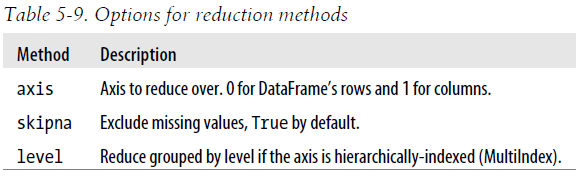

In [165]:
# 축소 메소드 옵션
reference(Table5_9, 450)

In [166]:
df.idxmax()

one    b
two    d
dtype: object

In [167]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [168]:
# 한번에 통계 결과를 여러개 만들어 내는 함수
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,7.100000,-1.300000


In [169]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

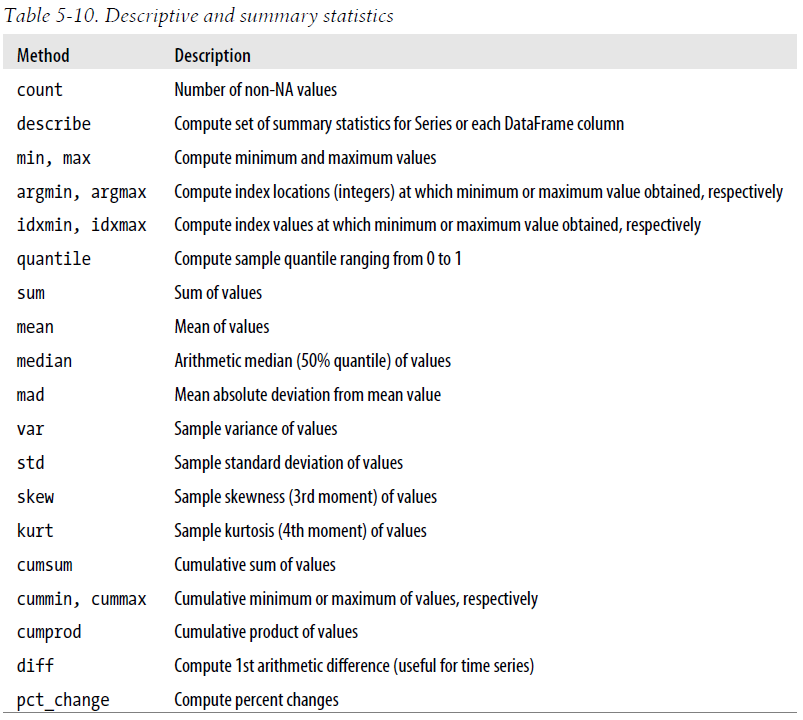

In [170]:
# 기술통계와 요약통계
reference(Table5_10, 600)

### <font color='brown'>Correlation and covariance</font>
> 상관관계와 공분산
- 상관관계와 공분산 같은 요약통계 계산은 인자가 두 벌 필요하다.
- Yahoo 금융사이트에서 구한 주식가격과 시가총액을 담고 있는 DataFrame에 대해 생각해보자

In [171]:
import pandas.io.data as web

all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker)

# price = DataFrame({tic: data['Adj Close']
#                    for tic, data in all_data.iteritems()})
# volume = DataFrame({tic: data['Volume']
#                     for tic, data in all_data.iteritems()})

C:\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [172]:
type(all_data['AAPL'])

pandas.core.frame.DataFrame

In [173]:
type(all_data['AAPL']['Adj Close'])

pandas.core.series.Series

In [174]:
# all_data['AAPL']['Adj Close']

In [175]:
all_data['AAPL'][0:10]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106
2010-01-11,212.799997,213.000002,208.450005,210.110003,115557400,27.339779
2010-01-12,209.189995,209.769995,206.419998,207.720001,148614900,27.028789
2010-01-13,207.870005,210.929995,204.099998,210.650002,151473000,27.410045
2010-01-14,210.110003,210.459997,209.020004,209.430000,108223500,27.251297


In [176]:
all_data.items()

dict_items([('MSFT',                  Open       High        Low      Close     Volume  Adj Close
Date                                                                        
2010-01-04  30.620001  31.100000  30.590000  30.950001   38409100  25.710416
2010-01-05  30.850000  31.100000  30.639999  30.959999   49749600  25.718722
2010-01-06  30.879999  31.080000  30.520000  30.770000   58182400  25.560888
2010-01-07  30.629999  30.700001  30.190001  30.450001   50559700  25.295062
2010-01-08  30.280001  30.879999  30.240000  30.660000   51197400  25.469510
2010-01-11  30.709999  30.760000  30.120001  30.270000   68754700  25.145534
2010-01-12  30.150000  30.400000  29.910000  30.070000   65912100  24.979392
2010-01-13  30.260000  30.520000  30.010000  30.350000   51863500  25.211991
2010-01-14  30.309999  31.100000  30.260000  30.959999   63228100  25.718722
2010-01-15  31.080000  31.240000  30.709999  30.860001   79913200  25.635652
2010-01-19  30.750000  31.240000  30.680000  31.100000 

In [177]:
price = DataFrame({tic: data['Adj Close']
                   for tic, data in all_data.items()})
price.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.847252,313.062468,112.285875,25.710416
2010-01-05,27.895396,311.683844,110.929466,25.718722
2010-01-06,27.451683,303.826685,110.208865,25.560888
2010-01-07,27.400936,296.753749,109.827375,25.295062
2010-01-08,27.583106,300.709808,110.929466,25.469510


In [178]:
volume = DataFrame({tic: data['Volume']
                    for tic, data in all_data.items()})
volume.head(10)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,123432400,3927000,6155300,38409100
2010-01-05,150476200,6031900,6841400,49749600
2010-01-06,138040000,7987100,5605300,58182400
2010-01-07,119282800,12876600,5840600,50559700
2010-01-08,111902700,9483900,4197200,51197400
2010-01-11,115557400,14479800,5730400,68754700
2010-01-12,148614900,9742900,8081500,65912100
2010-01-13,151473000,13041800,6455400,51863500
2010-01-14,108223500,8511900,7111800,63228100


In [179]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-01-13,-0.001761,0.001885,-0.003632,0.001437
2017-01-17,0.008065,-0.004048,0.003287,-0.002711
2017-01-18,-0.000083,0.001815,-0.006492,-0.000480
2017-01-19,-0.001750,-0.004832,0.000060,-0.003200
2017-01-20,0.001837,0.003547,0.022421,0.007063


In [180]:
returns.MSFT.corr(returns.IBM)

0.49666928615750294

In [181]:
returns.MSFT.cov(returns.IBM)

8.6844663692326788e-05

In [182]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.411460,0.383604,0.393440
GOOG,0.411460,1.000000,0.402426,0.472072
IBM,0.383604,0.402426,1.000000,0.496669
MSFT,0.393440,0.472072,0.496669,1.000000


In [183]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000271,0.000106,0.000076,0.000094
GOOG,0.000106,0.000246,0.000076,0.000108
IBM,0.000076,0.000076,0.000145,0.000087
MSFT,0.000094,0.000108,0.000087,0.000211


In [184]:
returns.corrwith(returns.IBM)

AAPL    0.383604
GOOG    0.402426
IBM     1.000000
MSFT    0.496669
dtype: float64

In [185]:
returns.corrwith(volume)

AAPL   -0.073705
GOOG   -0.008282
IBM    -0.196410
MSFT   -0.091458
dtype: float64

### <font color='brown'> Unique values, value counts, and membership </font>
> 유일 값, 값 세기, 멤버십

In [186]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [187]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [188]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [189]:
pd.value_counts(obj.values, sort=False)

b    2
a    3
c    3
d    1
dtype: int64

In [190]:
pd.value_counts(obj.values, sort=True)

c    3
a    3
b    2
d    1
dtype: int64

In [191]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [192]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [193]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [194]:
# DataFrame.apply() 
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


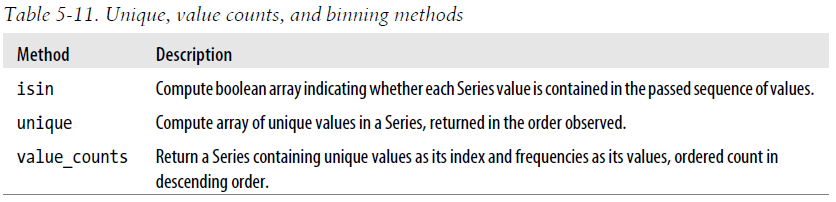

In [195]:
# 유일값, 값세기, 버리기 메소드
reference(Table5_11, 600)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>